###  Classifying CIFAR-10 Dataset with TensorFlow and Keras: A CNN Model

#### Step 1: Importing Necessary Libraries

In [1]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#### Step 2: Loading the CIFAR-10 Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

#### Step 3: Exploring the Data

Train Shape:  (50000, 32, 32, 3)
Test Shape:  (10000, 32, 32, 3)


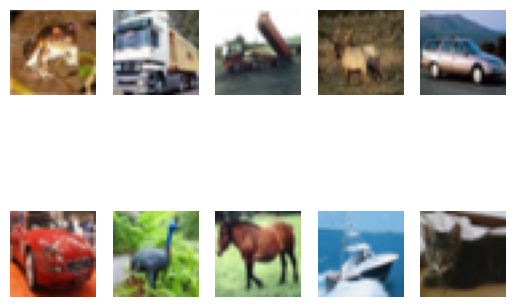

In [3]:
print('Train Shape: ', x_train.shape)
print('Test Shape: ', x_test.shape)

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')

plt.show()

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

#### Step 4: Normalizing the Data

In [4]:
x_train = x_train / 255
x_test = x_test / 255

#### Step 5: Building the CNN Model

In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

#### Step 6: Compiling the Model

In [6]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

#### Step 7: Training the Model

In [7]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3534 - loss: 1.7391 - val_accuracy: 0.5488 - val_loss: 1.2653
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5841 - loss: 1.1768 - val_accuracy: 0.6188 - val_loss: 1.0677
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6473 - loss: 0.9978 - val_accuracy: 0.6513 - val_loss: 1.0060
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6872 - loss: 0.8827 - val_accuracy: 0.6704 - val_loss: 0.9406
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7144 - loss: 0.8108 - val_accuracy: 0.6925 - val_loss: 0.8827
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7359 - loss: 0.7507 - val_accuracy: 0.6735 - val_loss: 0.9519
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7525 - loss: 0.7068 - val_accuracy: 0.7063 - val_loss: 0.8642
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7747 - loss: 0.6

#### Step 8: Evaluating the Model

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7219 - loss: 0.8786
Test accuracy: 71.70%


#### Step 9: Making Predictions

In [9]:
predictions = model.predict(x_test)
predict_labels = np.argmax(predictions, axis=1)
# print(predictions)
print(predict_labels)
print(predict_labels.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3 8 8 ... 5 0 7]
(10000,)


#### Step 10: Visualizing Predictions

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

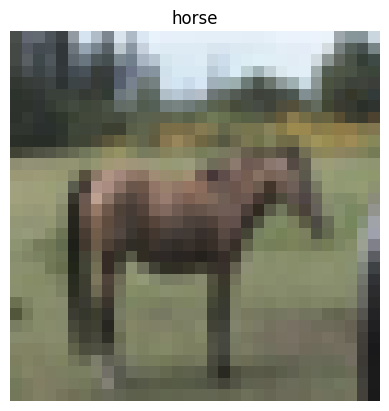

In [12]:
i = 9999
plt.imshow(x_test[i])
plt.title(classes[predict_labels[i]])
plt.axis('off')